# Hritika Singh

## Data Transformation and Mapping
- **apply**: allows us to apply a function to each element, row, or column in a DataFrame or Series
- **map**: is used to map values in a Series according to a dictionary or another Series 
- **replace**: replace allows for replacing specific values in the DataFrame with new value
- **astype**: this is used to convert data type
- **pipe**: it allows chaining and using complex functions that operate on the entire DataFrame. This can be used for complex transformation operation

### apply

In [2]:
# convert marks to scale of 1
import pandas as pd
students = pd.read_csv('data/student.csv')
students['mark_percent'] = students['mark'].apply(lambda m: m/100)
students.head()


,id,name,class,mark,gender,mark_percent
0,1,John Deo,Four,75,NaN,0.75
1,2,Max Ruin,Three,85,male,0.85
2,3,Arnold,NaN,55,male,0.55
3,4,Krish Star,Four,60,female,0.60
4,5,John Mike,Four,60,female,0.60


### map

In [3]:
#Replace
students['grade'] = students['class'].map({'One':1,'Two':2,'Three':3,'Four':4,'Five':5,
                                           'Six':6,'Seven':7,'Eight':8,'Nine':9,'Ten':10})
students['gender_code'] = students['gender'].map({'male':1,'female':2})
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,John Deo,Four,75,NaN,0.75,4.0,NaN
1,2,Max Ruin,Three,85,male,0.85,3.0,1.0
2,3,Arnold,NaN,55,male,0.55,NaN,1.0
3,4,Krish Star,Four,60,female,0.60,4.0,2.0
4,5,John Mike,Four,60,female,0.60,4.0,2.0


### replace

In [4]:
#Replace specific values in the 'class' column
students['class'] = students['class'].replace({'Four':'4th','Ten':'10th','Eight':'8th'})
#replace name 'John Deo' with 'Hri'
students['name'] = students['name'].replace({'John Deo':'Hri'})
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,Hri,4th,75,NaN,0.75,4.0,NaN
1,2,Max Ruin,Three,85,male,0.85,3.0,1.0
2,3,Arnold,NaN,55,male,0.55,NaN,1.0
3,4,Krish Star,4th,60,female,0.60,4.0,2.0
4,5,John Mike,4th,60,female,0.60,4.0,2.0


### astype

In [5]:
# Convert 'mark' column to float
students['mark'] = students['mark'].astype(float)
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,Hri,4th,75.0,NaN,0.75,4.0,NaN
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1.0
2,3,Arnold,NaN,55.0,male,0.55,NaN,1.0
3,4,Krish Star,4th,60.0,female,0.60,4.0,2.0
4,5,John Mike,4th,60.0,female,0.60,4.0,2.0


### pipe

In [6]:
# create a function that triples marks and pipes it to the pandas DataFrame

students = pd.read_csv('data/student.csv')
def triple_marks(df):
    df['mark']= df['mark'] * 3
    return df

def check_result(df):
    df['result'] = df['mark'].apply(lambda m : 'pass' if m>40 else 'fail')
    return df

students = students.pipe(check_result)
students.head()

,id,name,class,mark,gender,result
0,1,John Deo,Four,75,NaN,pass
1,2,Max Ruin,Three,85,male,pass
2,3,Arnold,NaN,55,male,pass
3,4,Krish Star,Four,60,female,pass
4,5,John Mike,Four,60,female,pass


### Data cleaning and manipulation
- Handle Missing Data
- Handle Duplications
- One-hot_Encoding
- Normalization

- Remove Rows Containing Missing Values (df. dropna ())
    - dropna (axis=0) removes rows containing at least one missing value
    - (dropna (axis=1)) Removes columns containing at least one missing value
- Replace Missing Values (df.fillna())
    - Replace with specific value: (df.fillna(value)) fill the missing values with the previous row value of column value (if axis =1)
    - Backward Fill, Forward Fill: (df. fillna (value, method="bfill*))
    (df. fillna(value, method='ffill')) replaces the missing values with the next value
    - Fill individual column with specified value: (df. fillna({'height' :150, weight: 60})
    replaces the missing values of column.height with 150 and column weight with 60
    - Fill the average,--- missing values using average, or using interpolation


In [7]:
from IPython.display import display

students = pd.read_csv('data/student.csv')
display(students.head())
#students.dropna(axis=0, how = 'any', inplace=True)

#students = students.fillna(1) #replace missing valyes with 1

students.fillna(method = 'ffill') #fill with previous row value
students.fillna(method = 'bfill') #fill with next row
students['mark'].fillna(50) #only fill empty value of Name column
students.fillna({'mark':50, 'gender': 'Male'}) #replace mark with 50 if its empty and gender
df_interpolated = students.interpolate()
students.fillna(df_interpolated)
students['mark'].fillna(students['mark'].mean())

display(students.head())

,id,name,class,mark,gender
0,1,John Deo,Four,75,NaN
1,2,Max Ruin,Three,85,male
2,3,Arnold,NaN,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


C:\Users\HRITIKA SINGH\AppData\Local\Temp\ipykernel_54536\773364397.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students.fillna(method = 'ffill') #fill with previous row value
C:\Users\HRITIKA SINGH\AppData\Local\Temp\ipykernel_54536\773364397.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students.fillna(method = 'bfill') #fill with next row
C:\Users\HRITIKA SINGH\AppData\Local\Temp\ipykernel_54536\773364397.py:13: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = students.interpolate()


,id,name,class,mark,gender
0,1,John Deo,Four,75,NaN
1,2,Max Ruin,Three,85,male
2,3,Arnold,NaN,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


## Handle Duplicate Data
- Check Duplicates
- Drop Dublicates

In [8]:
duplicates = students.duplicated() #check duplicate
students.drop_duplicates()
duplicates

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

## One-Hot Encoding
- One Hot Encoding is a method for converting categorical variables into a binary format. It creates new binary columns (Os and 1s) for each category in the original variable. Each category in the original column is represented as a separate column, where a value of 1 indicates the presence of that category, and 0 indicates its absence For example we replace the country name with numerical
value e.g. America = 1, India=2 Nepal=3 

In [9]:
students = pd.read_csv('data/student.csv')
df_pandas_encoded = pd.get_dummies(students, columns=['class'])
print(f"One-Hot Encoded Data using Pandas: \n")
display(df_pandas_encoded)

One-Hot Encoded Data using Pandas: 



,id,name,mark,gender,class_Eight,class_Fifth,class_Five,class_Four,class_Nine,class_Seven,class_Six,class_Three
0,1,John Deo,75,NaN,False,False,False,True,False,False,False,False
1,2,Max Ruin,85,male,False,False,False,False,False,False,False,True
2,3,Arnold,55,male,False,False,False,False,False,False,False,False
3,4,Krish Star,60,female,False,False,False,True,False,False,False,False
4,5,John Mike,60,female,False,False,False,True,False,False,False,False
5,6,Alex John,55,male,False,False,False,True,False,False,False,False
6,7,My John Rob,78,male,False,True,False,False,False,False,False,False
7,8,Asruid,85,male,False,False,True,False,False,False,False,False
8,9,Tes Qry,78,male,False,False,False,False,False,False,True,False
9,10,Big John,55,female,False,False,False,True,False,False,False,False


## Data Normalization
Data normalization involves adjusting measurements values of different scales to a common scale. 
Normalization is only applicable to numerical columns.

In [10]:
import numpy as np
import pandas as pd
products =pd.read_csv('data/product-data.csv')
#Single Feature Scaling
products['Sales_Single_Scale']=products['Sales']/ products['Sales'].max()

#log
products['Sales_Log_Scale']=np.log1p(products['Sales'])

#Clipping
products['Discount_Clipped']=products['Discount_Percentage'].clip(lower=5,upper=15)

products

,Product_ID,Sales,Price,Customer_Rating,Discount_Percentage,Sales_Single_Scale,Sales_Log_Scale,Discount_Clipped
0,1,500,200,4.2,10,0.50,6.216606,10
1,2,700,450,3.9,15,0.70,6.552508,15
2,3,800,300,4.5,12,0.80,6.685861,12
3,4,900,350,4.8,8,0.90,6.803505,8
4,5,1000,500,4.0,5,1.00,6.908755,5
5,6,300,250,3.7,20,0.30,5.707110,15
6,7,450,275,4.3,17,0.45,6.111467,15
7,8,620,320,3.8,7,0.62,6.431331,7
8,9,750,400,4.1,6,0.75,6.621406,6
9,10,850,375,4.6,14,0.85,6.746412,14


## Grouping & Aggregate
- Grouping consists of three operations
    - Split
    - Apply
    - Combine

In [11]:
import numpy as np
from IPython.display import display

students = pd.read_csv('data/student.csv')

#group by gender
gender_data = students.groupby('gender')
display(gender_data.count())
gender_data['mark'].mean()
#standard deviation (std())

group_by_class = students.groupby('class')
display(group_by_class['mark'].mean())
display(group_by_class['id'].count())


,id,name,class,mark
gender,,,,
female,16,16,16,16
male,18,18,17,18


class
Eight    79.000000
Fifth    78.000000
Five     80.000000
Four     70.888889
Nine     41.500000
Seven    77.600000
Six      82.571429
Three    83.000000
Name: mark, dtype: float64

class
Eight     1
Fifth     1
Five      2
Four      9
Nine      2
Seven    10
Six       7
Three     2
Name: id, dtype: int64

## Aggregation
- count()-Numbers of non-null observations
- sum()-Sum of values
- mean()- Mean of values
- median()- Arithmetic median of values
- min()-Minimum
- max()-Maximum
- mode()-Mode
- std()-Standard Deviation
- var()-Variance

## Sorting
Sort by Index

Sort by value
- Ascending
- Descending
- Sorting by data
- Sorting with key function

In [12]:
country_data_list = [
            ['Afghanistan', 1952, 8425333, 'Asia'],
            ['Australia', 1957, 9712569, 'Oceania'],
            ['Brazil', 1892, 9873823, 'America'],
]
country_data = pd.DataFrame(country_data_list, columns=['Country','Year','Population','Continent'])
new_sorted_data = country_data.sort_values(by=['Country'],ascending=True)
display(new_sorted_data)

sort_by_descending = country_data.sort_values(by=['Country'],ascending=False)
display(sort_by_descending)
sort_by_population = country_data.sort_values(by=['Population','Country'], ascending=False)
display(sort_by_population)


,Country,Year,Population,Continent
0,Afghanistan,1952,8425333,Asia
1,Australia,1957,9712569,Oceania
2,Brazil,1892,9873823,America


,Country,Year,Population,Continent
2,Brazil,1892,9873823,America
1,Australia,1957,9712569,Oceania
0,Afghanistan,1952,8425333,Asia


,Country,Year,Population,Continent
2,Brazil,1892,9873823,America
1,Australia,1957,9712569,Oceania
0,Afghanistan,1952,8425333,Asia


## Sorting by Data
If we want sort data based on datetime we need to convert the datetime to datetime object

In [13]:
data = pd.read_csv('data/student-admission.csv')
#convert to datetime
data['AdmissionDate']= pd.to_datetime(data['AdmissionDate'])
#sort by AdmissionDate
sort_by_date = data.sort_values(by=['AdmissionDate','Name'],ascending=False)
sort_by_date

,Unnamed: 0,AdmissionDate,StudentID,Name,Stream
0,0,2021-01-25,7,Ram,CSE
1,1,2021-01-22,5,Shyam,ECE
4,4,2021-01-22,6,Lucky,CSE
6,6,2021-01-21,4,Danny,EEE
2,2,2021-01-20,3,Mohan,Civil
3,3,2021-01-18,2,Sohan,Mechanical
5,5,2021-01-17,1,Abhinav,IT


## Category
 Relationship
- Scatter Plot
- Bubble Chart

Heat Map

Density Plot

Correlation Matrix

Distributions 
- Histogram
- Box Plot (Box-and-Whisket Plot)

Violin Plot 

Frequency Polygon

Stem-and-


## Data Comparison Visualisation
- Bar Charts
- Line Graphs
- Multiple Line Graphs

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Compare GDP growth of Nepal, India and China
- Bar chart
- Line graph

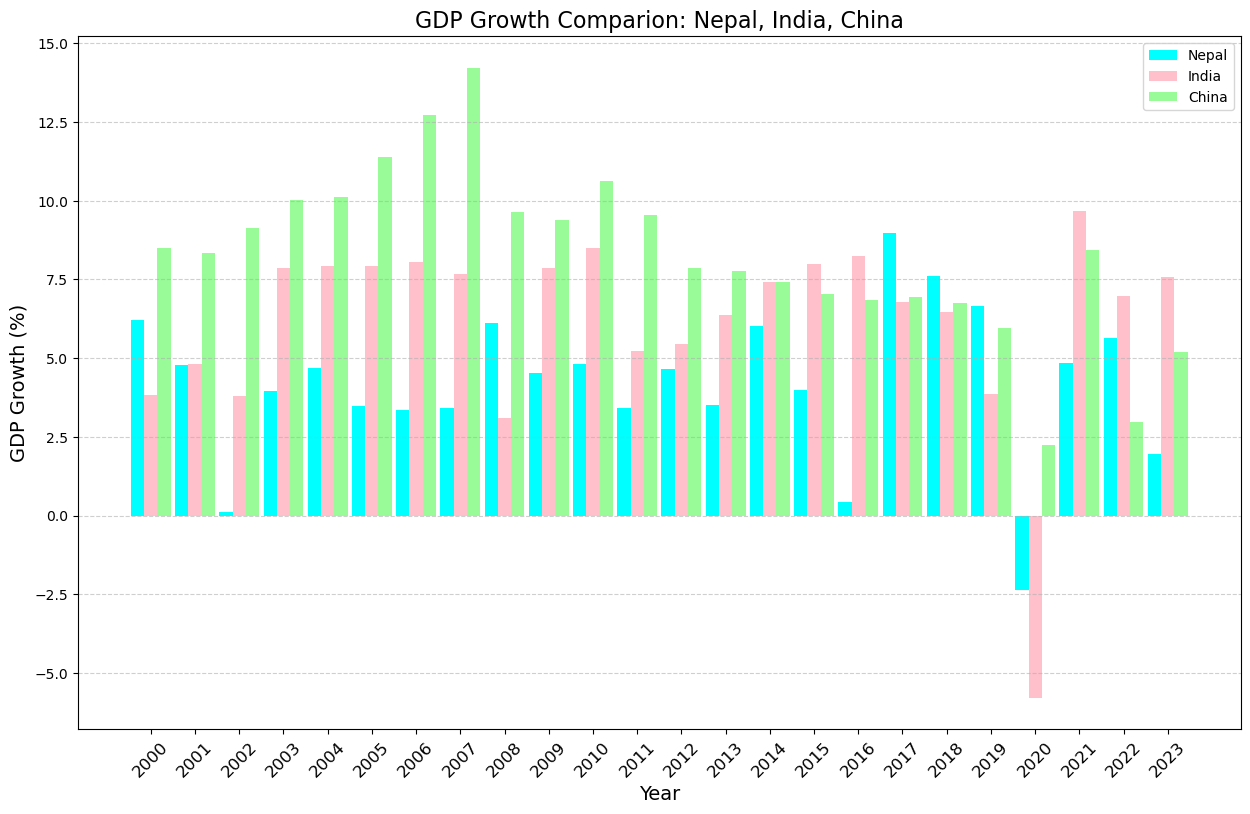

In [15]:
nep_ind_china_gdp_data = pd.read_csv('data/nep-india-china-gdp.csv')
#set up the figure size
plt.figure(figsize=(15,9))
#define the width of the bars
width = 0.3
x = range(len(nep_ind_china_gdp_data['Year']))
#plotting the bars for Nep Ind and China
plt.bar([i - width for i in x], nep_ind_china_gdp_data['Nepal'], width=width, label='Nepal', color='cyan')
plt.bar(x, nep_ind_china_gdp_data['India'], width=width, label='India',color='pink')
plt.bar([i + width for i in x], nep_ind_china_gdp_data['China'], width=width, label='China', color='palegreen')

#adding titles and labels
plt.title('GDP Growth Comparion: Nepal, India, China',fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP Growth (%)', fontsize=14)
plt.xticks(x, nep_ind_china_gdp_data['Year'], fontsize=12, rotation=45 )
plt.legend()

plt.grid(axis='y',linestyle='--', alpha=0.6)
plt.show()        

# Line Graph

<function matplotlib.pyplot.show(close=None, block=None)>

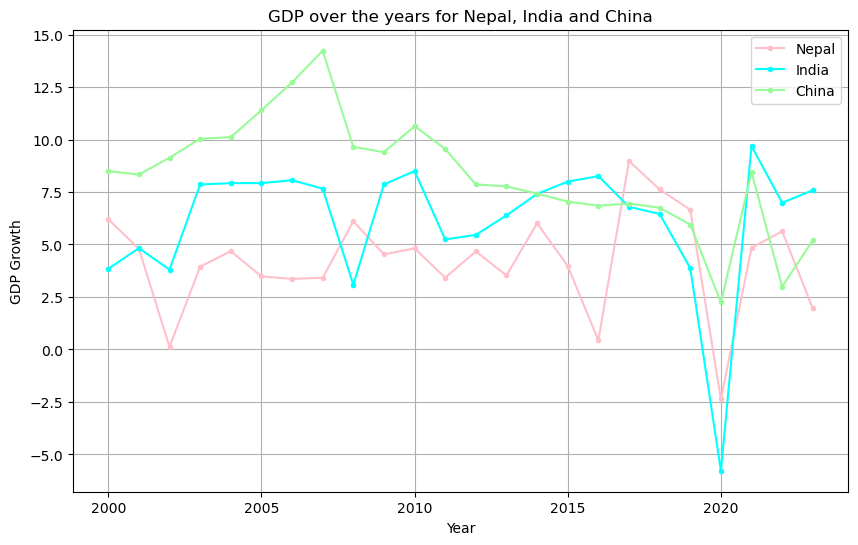

In [16]:
nep_ind_china_gdp_data = pd.read_csv('data/nep-india-china-gdp.csv')

#Data
years = nep_ind_china_gdp_data['Year']
nepal_gdp = nep_ind_china_gdp_data['Nepal']
india_gdp = nep_ind_china_gdp_data['India']
china_gdp = nep_ind_china_gdp_data['China']
#create the plot
plt.figure(figsize=(10,6))
plt.plot(years, nepal_gdp, label='Nepal', color='pink', marker='.')
plt.plot(years, india_gdp, label='India', color='cyan', marker='.')
plt.plot(years, china_gdp, label='China', color='palegreen', marker='.')
#labeling the axes and title
plt.xlabel('Year')
plt.ylabel('GDP Growth')
plt.title('GDP over the years for Nepal, India and China')
#show legend
plt.legend()
#show
plt.grid(True)
plt.show


## Visualize Relationship between Data
- *Scatter Plot*: A scatter plot identifies a possible relationship between changes observed in two different sets of variable.
- *Bubble chart*: A bubble chart can be used to represent the relationship between x(age), y(income), and bubble size(expense).
- *Heat map*: Heat maps are graphical representation of data that use colors to show the intensity of a variable or a relationship.
- *Density Plot*: A density plot visualizes the distribution of data over a continuous interval or time period.
- *Correlation Matrix*: A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a dataset.

## Scattered Plot

,Year,GDP,per_capita,Growth,trade_balance_usd_billon,contribution_of_manufacturing_industry_to_gdp,no_of_people_in_foreign_employment
0,1965,0.735267,67.0075,-1.2032,-0.045282,3.284541,0.0
1,1966,0.906812,81.1644,7.0406,-0.028219,3.430308,0.0
2,1967,0.841974,73.9679,-1.5715,-0.000656,3.413874,0.0
3,1968,0.772229,66.5489,0.6755,-0.005060,3.568939,0.0
4,1969,0.788642,66.6383,4.4634,-0.025284,3.844709,0.0


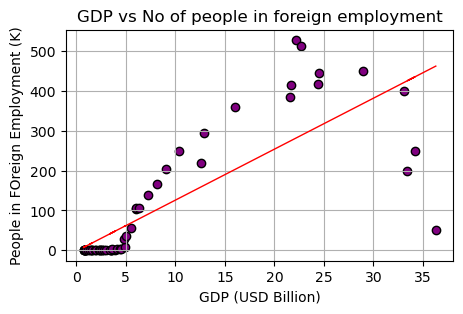

In [17]:
from IPython.display import display
import numpy as np
 # Create the scatter plot
nepal_economy = pd.read_csv('data/nepal-economy.csv')
nepal_economy['no_of_people_in_foreign_employment'] = nepal_economy['no_of_people_in_foreign_employment'].apply(lambda n : n/1000)
display(nepal_economy.head())

plt.figure(figsize=(5, 3))
plt.scatter(
    nepal_economy['GDP'],
    nepal_economy['no_of_people_in_foreign_employment'],
    color='purple',
    edgecolor='black'
)

# Fit a linear regression model to the data
x = nepal_economy['GDP']
y = nepal_economy['no_of_people_in_foreign_employment']
m, c = np.polyfit(x, y, 1) #1 is degree of polynomial y = mx+c is of degree 1

# Plot the trend line
plt.plot(x, m * x + c, color = 'red', linewidth=1, label='GDP-FE-Trend-Line')
plt.title('GDP vs No of people in foreign employment')
plt.xlabel('GDP (USD Billion)')
plt.ylabel('People in FOreign Employment (K)')
plt.grid(True)

#Display the plot
plt.show()

## Bubble chart

,Year,GDP,per_capita,Growth,trade_balance_usd_billon,contribution_of_manufacturing_industry_to_gdp,no_of_people_in_foreign_employment
0,1965,0.735267,67.0075,-1.2032,-0.045282,3.284541,0.0
1,1966,0.906812,81.1644,7.0406,-0.028219,3.430308,0.0
2,1967,0.841974,73.9679,-1.5715,-0.000656,3.413874,0.0
3,1968,0.772229,66.5489,0.6755,-0.005060,3.568939,0.0
4,1969,0.788642,66.6383,4.4634,-0.025284,3.844709,0.0


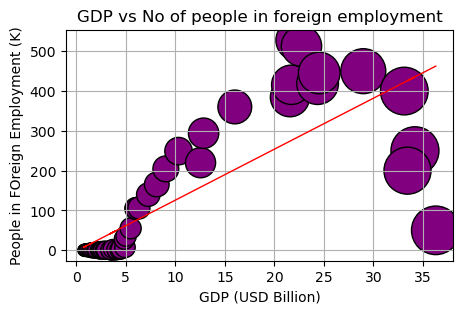

In [18]:
from IPython.display import display
import numpy as np
 # Create the scatter plot
nepal_economy = pd.read_csv('data/nepal-economy.csv')
nepal_economy['no_of_people_in_foreign_employment'] = nepal_economy['no_of_people_in_foreign_employment'].apply(lambda n : n/1000)
display(nepal_economy.head())

plt.figure(figsize=(5, 3))
plt.scatter(
    nepal_economy['GDP'],
    nepal_economy['no_of_people_in_foreign_employment'],
    color='purple',
    edgecolor='black',
    s=nepal_economy['per_capita']
)

# Fit a linear regression model to the data
x = nepal_economy['GDP']
y = nepal_economy['no_of_people_in_foreign_employment']
m, c = np.polyfit(x, y, 1) #1 is degree of polynomial y = mx+c is of degree 1

# Plot the trend line
plt.plot(x, m * x + c, color = 'red', linewidth=1, label='GDP-FE-Trend-Line')
plt.title('GDP vs No of people in foreign employment')
plt.xlabel('GDP (USD Billion)')
plt.ylabel('People in FOreign Employment (K)')
plt.grid(True)

#Display the plot
plt.show()

## Heat Map

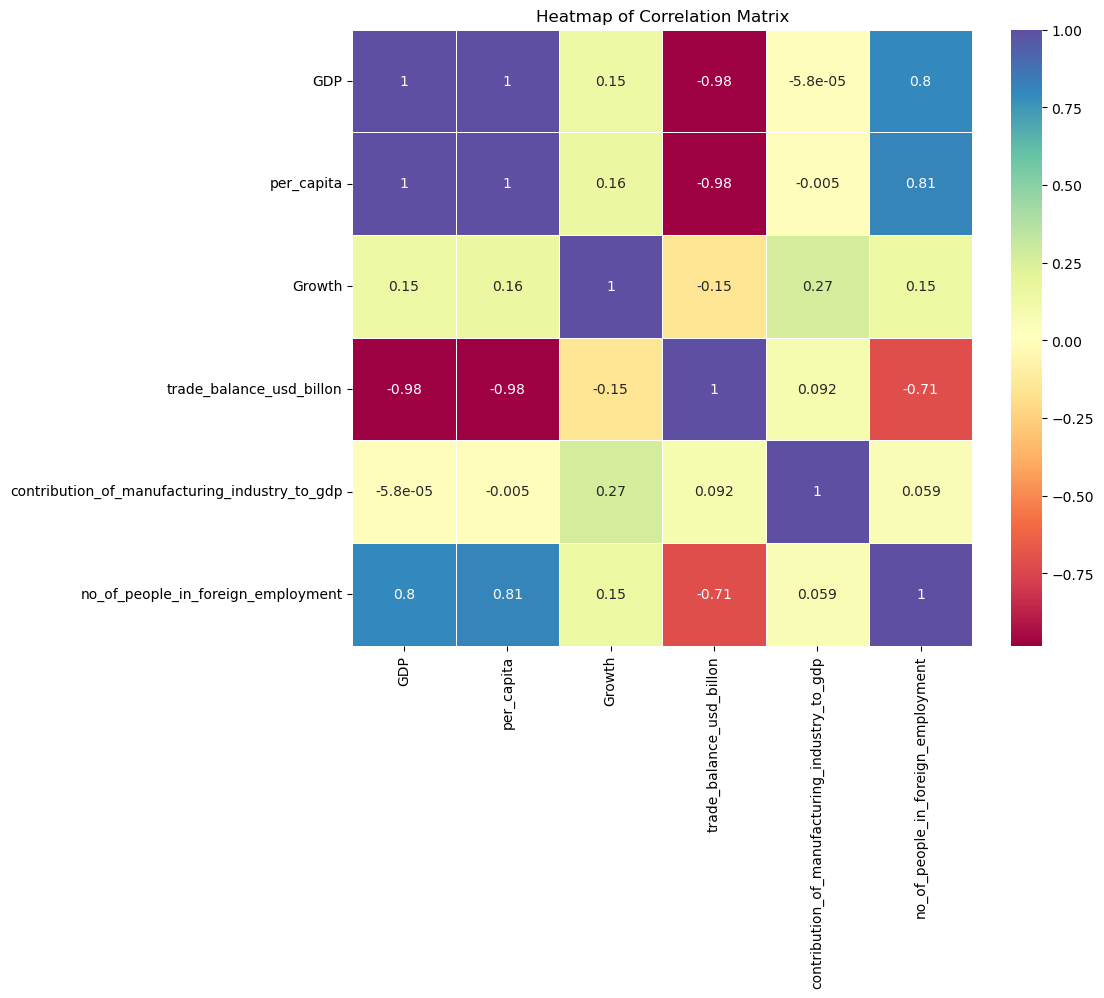

In [19]:
plt.figure(figsize=(10,8))
correlation_matrix = nepal_economy.drop(columns=['Year'],inplace=False).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Distributions
- *Histogram*:
- *Frequency Polygons*:
- *Cumulative Frequency*:
- *Box Plot*:  

## Histogram

[0, 20, 40, 60, 80, 100]


,Marks,no_of_students,mid_points
0,0-20,10,10.0
1,20-40,22,30.0
2,40-60,35,50.0
3,60-80,28,70.0
4,80-100,15,90.0


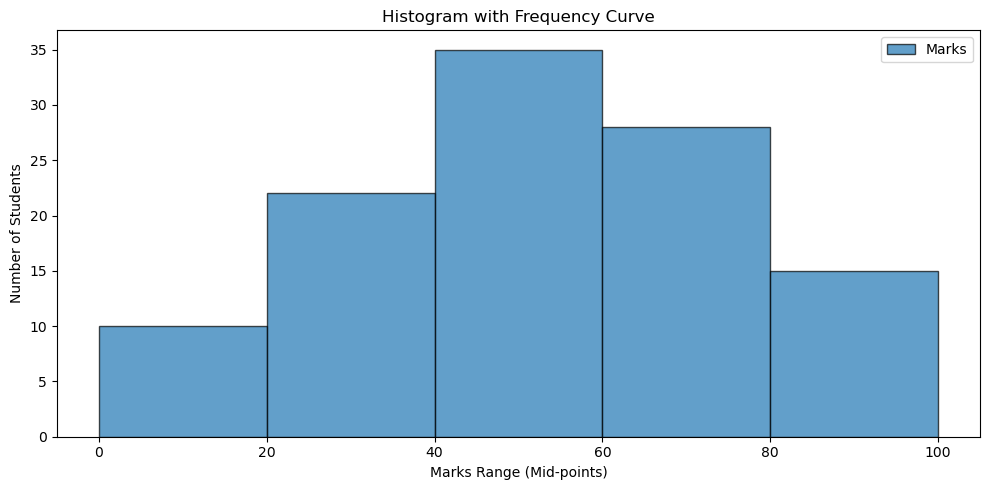

In [20]:
students_data = pd.DataFrame({
    'Marks': ['0-20', '20-40', '40-60', '60-80', '80-100'],
    'no_of_students': [10, 22, 35, 28, 15]
})

students_data['mid_points'] = students_data['Marks'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

lower_bounds = students_data['Marks'].apply(lambda x: int(x.split('-')[0])).min()
upper_bounds = students_data['Marks'].apply(lambda x: int(x.split('-')[1])).max()

bin_edges = list(range(lower_bounds, upper_bounds + 1, 20))

print(bin_edges)

display(students_data.head())

plt.figure(figsize=(10, 5))
# Use mid-points as the x-values for the histogram and the frequency as y-values
plt.hist(students_data['mid_points'], bins = bin_edges, weights = students_data['no_of_students'],
         edgecolor = 'black', alpha = 0.7, label = 'Marks')

# Add labels and titles
plt.xlabel('Marks Range (Mid-points)')
plt.ylabel('Number of Students')
plt.title('Histogram with Frequency Curve')
# Display the legend
plt.legend()
plt.tight_layout()
# Show the plot
plt.show()

## Cumulative Frequency

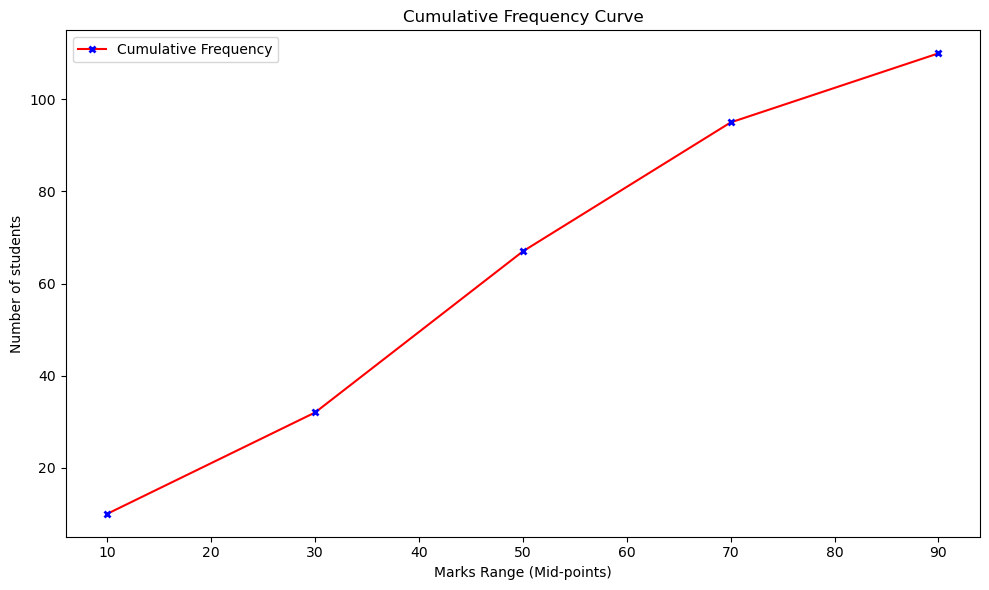

,Marks,no_of_students,mid_points,cumulative frequency
0,0-20,10,10.0,10
1,20-40,22,30.0,32
2,40-60,35,50.0,67
3,60-80,28,70.0,95
4,80-100,15,90.0,110


In [21]:
plt.figure(figsize=(10,6))
# sns.distplot(x, kde=True, norm_hist=True)
cumulative_frequency = np.cumsum(students_data['no_of_students'])
students_data['cumulative frequency'] = cumulative_frequency

sns.lineplot(x = students_data['mid_points'], 
             y = students_data['cumulative frequency'], 
             color='red', marker='x', markersize = 5, markeredgewidth = 2,
             markeredgecolor = 'blue', linestyle = '-', 
             label = 'Cumulative Frequency')

# Add labels and titles
plt.title('Cumulative Frequency Curve')
plt.xlabel('Marks Range (Mid-points)')
plt.ylabel('Number of students')


# Display the legend
plt.legend()
plt.tight_layout()

# Show the plot

plt.show()

display(students_data)

## Pie Chart

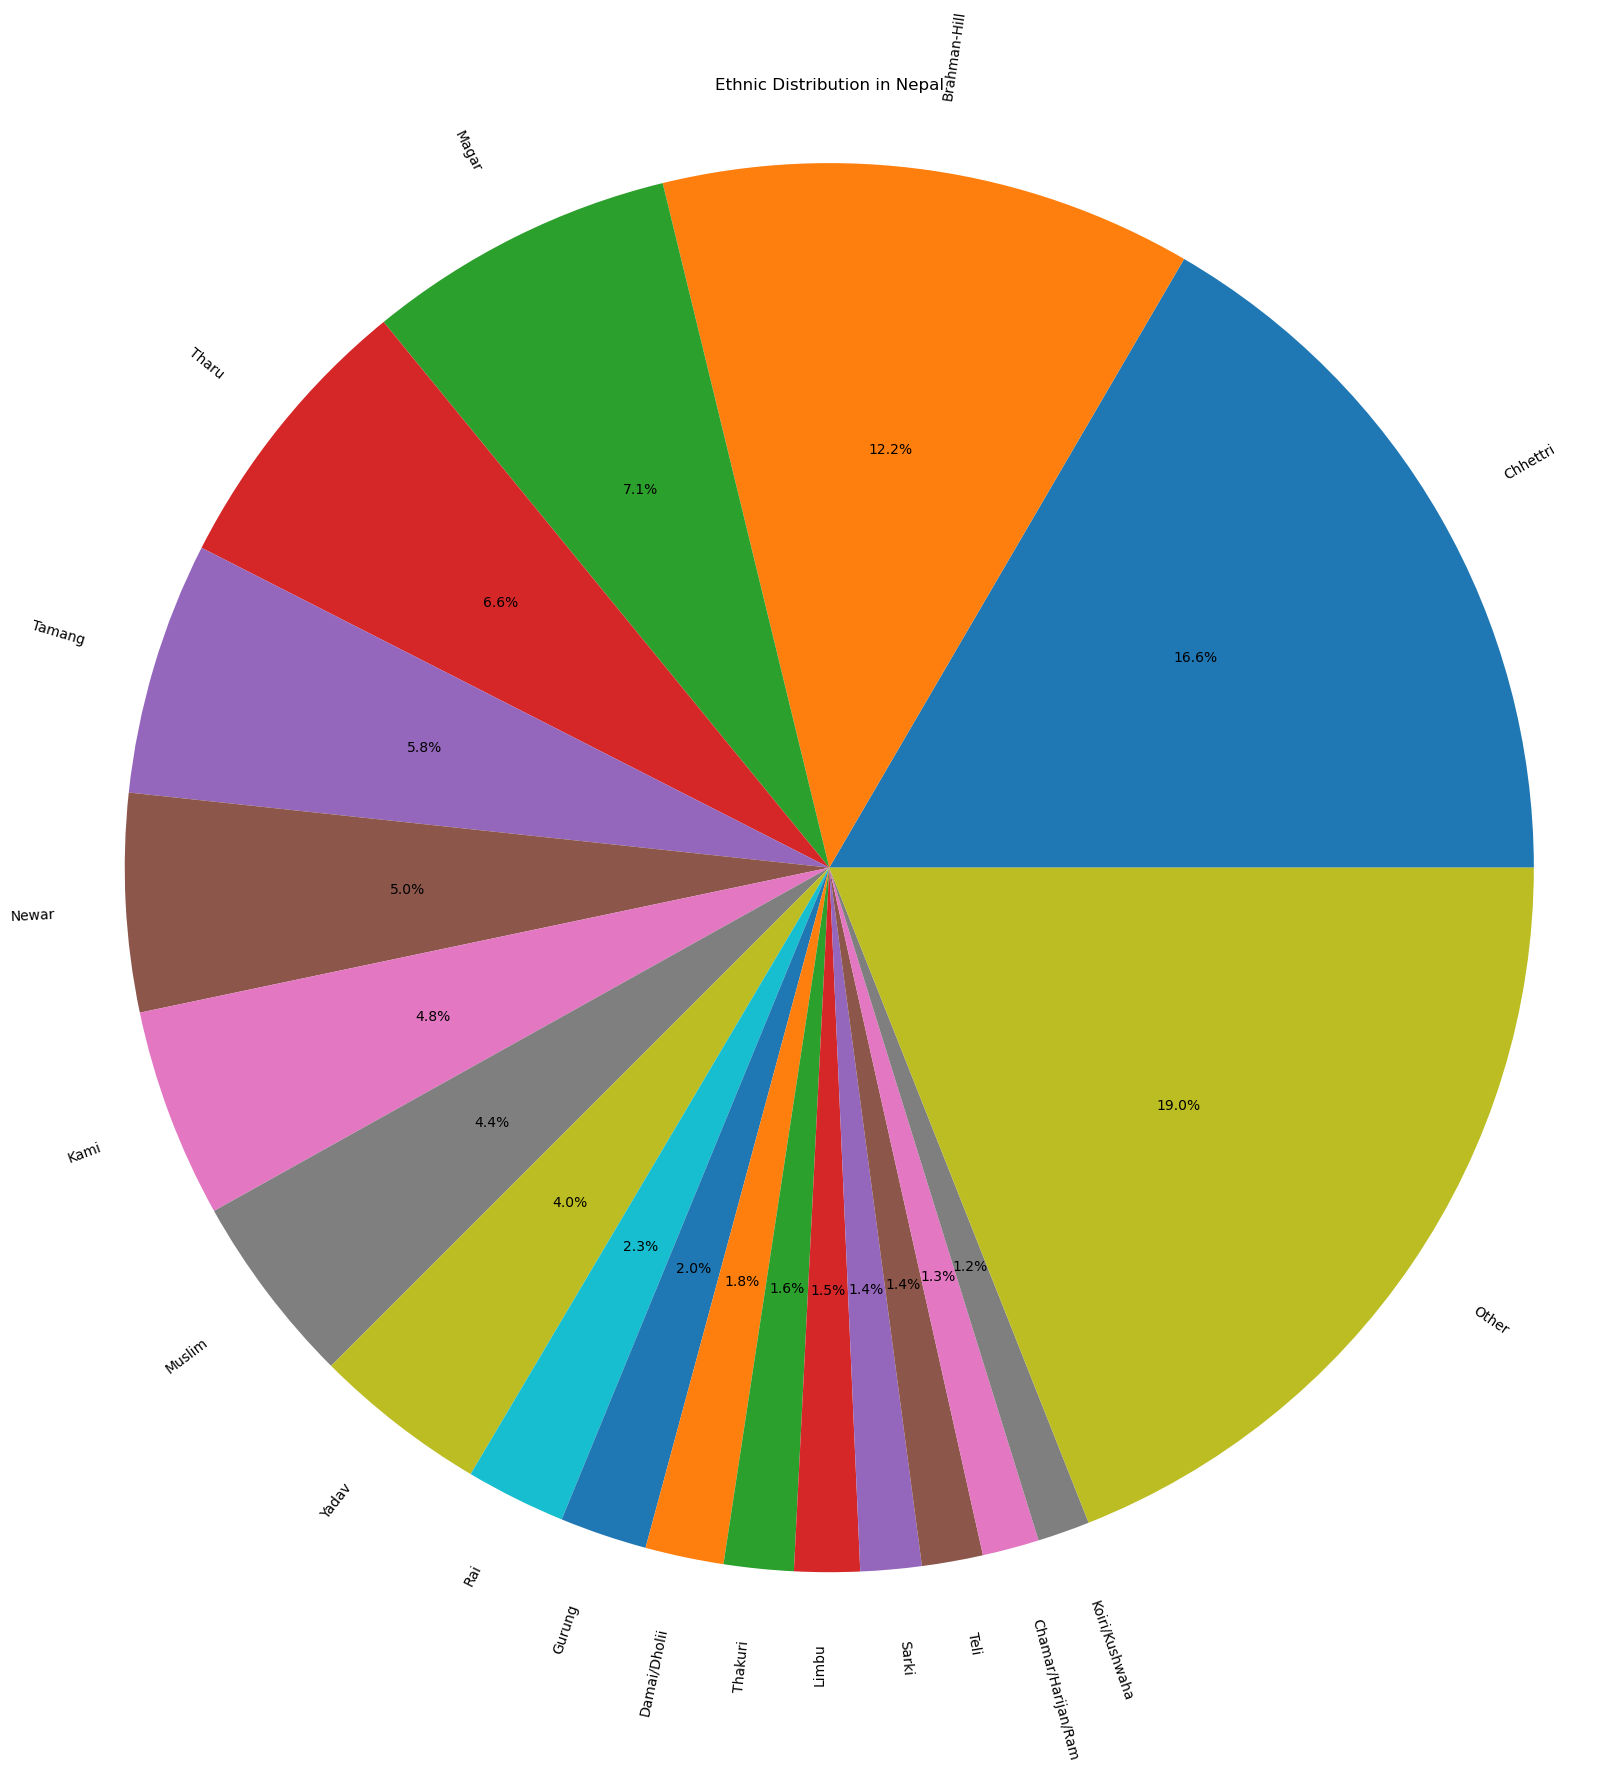

In [22]:
import matplotlib.pyplot as plt
import json

with open('data/nepal-population-ethinic-group.json','r') as file:
    ethinic_dist = json.load(file)

# data population
labels = ethinic_dist.keys()
sizes = ethinic_dist.values()

#create pie chart
plt.figure(figsize=(20,20))
plt.pie(sizes,labels=labels, autopct='%1.1f%%',startangle=0, rotatelabels=45)
plt.title('Ethnic Distribution in Nepal')
plt.axis('equal')

plt.show()   

Stacked Bar Graph

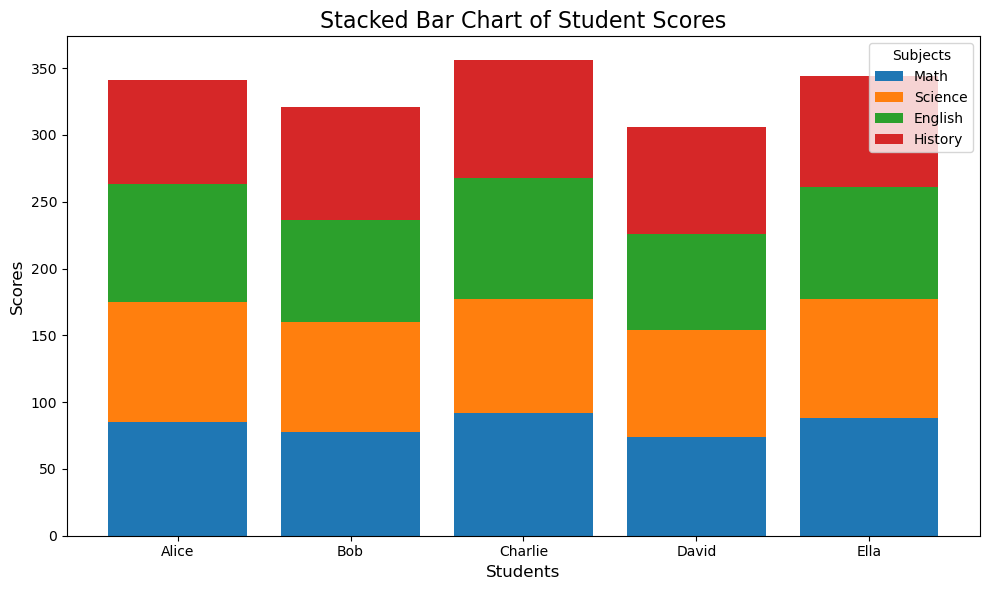

In [26]:
# Load the data from the CSV file
data = pd.read_csv('data/students_scores.csv')

# Prepare data for the stacked bar chart
students = data['Student']
subjects = data.columns[1:]  # Exclude the "Student" column
scores = data[subjects].to_numpy()  # Convert scores to a numpy array

# Define bar positions
x = np.arange(len(students))  # X-axis positions for the students
bar_width = 0.8

# Initialize the bottom position for stacking
bottom_stack = np.zeros(len(students))

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each subject as a stacked layer
for idx, subject in enumerate(subjects):
    plt.bar(x, scores[:, idx], bar_width, bottom=bottom_stack, label=subject)
    bottom_stack += scores[:, idx]  # Update the bottom stack for the next subject

# Add chart labels and title
plt.xlabel('Students', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Stacked Bar Chart of Student Scores', fontsize=16)
plt.xticks(x, students, fontsize=10)  # Set x-ticks to student names
plt.legend(title='Subjects', fontsize=10)

# Add a tight layout and show the plot
plt.tight_layout()
plt.show()

## Introduction to Numpy
- NumPy stands for numerical python, is an open-source Python library that provides support for large, multi-dimensional arrays and martices.
- It also has a collection of high-level mathematical functions to operate on arrays.

## Features of NumPy:

- A powerful N-dimensional array object
- Sophisticated (broadcasting) functions
- Tools for integrating C/C++ and Fortran code
- Linear algebra, Fourier transform, and random number capabilities

## NumPy Array Creation
From Python List, Tuple

In [ ]:
import numpy as np

np_array = np.array([1,2,3,4,5,6]) #from list
print(np_array)
np_array_tuple = np.array([1,3,4,5]) #from tuple
print(np_array_tuple)
print(type(np_array))
print(np_array.dtype)

[1 2 3 4 5 6]
[1 3 4 5]
<class 'numpy.ndarray'>
int32


## Create array with default values
- Create an array filled with zeroes np.zeroes((2,2))
- Create an array filled with ones'' np.ones((2,2))
- Create an array filled with a specific value (n.full(2,2),3)

In [ ]:
zeros_array = np.zeros((2,2))
print(zeros_array)
ones_array = np.ones((3,4))
print(ones_array)
fill_array = np.full((2,2),5)
print(fill_array)
print(zeros_array.dtype)

[[0. 0.]
 [0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[5 5]
 [5 5]]
float64


##  Creating Arrays with range of values
- np.arrange (0,25,5) # [0,5,10,15,20] similar to range
- np.linespace(0,100,1000) create evenly spaced values (1000) between start (0)- end(100)

In [ ]:
import numpy as np

# Create an array with values from 0 to 25 with a step size of 5
np_arange = np.arange(0, 25, 1)
print(np_arange)

# Create an array with 100 evenly spaced values between 0 and 100
np_linspace = np.linspace(0, 100, 100)
print(np_linspace)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[  0.           1.01010101   2.02020202   3.03030303   4.04040404
   5.05050505   6.06060606   7.07070707   8.08080808   9.09090909
  10.1010101   11.11111111  12.12121212  13.13131313  14.14141414
  15.15151515  16.16161616  17.17171717  18.18181818  19.19191919
  20.2020202   21.21212121  22.22222222  23.23232323  24.24242424
  25.25252525  26.26262626  27.27272727  28.28282828  29.29292929
  30.3030303   31.31313131  32.32323232  33.33333333  34.34343434
  35.35353535  36.36363636  37.37373737  38.38383838  39.39393939
  40.4040404   41.41414141  42.42424242  43.43434343  44.44444444
  45.45454545  46.46464646  47.47474747  48.48484848  49.49494949
  50.50505051  51.51515152  52.52525253  53.53535354  54.54545455
  55.55555556  56.56565657  57.57575758  58.58585859  59.5959596
  60.60606061  61.61616162  62.62626263  63.63636364  64.64646465
  65.65656566  66.66666667  67.67676768  68.68686869  69.6969697


## Identity, Diagonal matrices
- np.eye(3,3)
- np.diag([1,2,3])

In [ ]:
identitical_array= np.eye(3,3)
print(identitical_array)
diagonal_array= np.diag([1,2,3])
print(diagonal_array)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1 0 0]
 [0 2 0]
 [0 0 3]]


## Random Arrays
# Random Arrays
- ``np. random.rand([3,3])`` create 3 x 3 array filled with random numbers
- ``np. random. rand([3,3])`` create 3 x 3 array of random numbers, where random numbers are from a standard normal distribution (mean=0, std=1)
- ``np. random. randint (1, 100, (3, 3))`` create 3 x 3 array of random numbers, where numbers are in between 1-100
- ``np. random. choice([1,2,3,4,5,6,10],size=(3,3))`` create 3 x 3 array of random numbers, where numbers are from given list

[[0.24003262 0.4168257  0.76450558]
 [0.43133992 0.38121641 0.94827801]
 [0.62639206 0.67690204 0.74243989]]
[[79 24 28]
 [60 63 44]
 [83 22 83]]
[[ 1  4  4]
 [10  5  5]
 [ 5  4  2]]


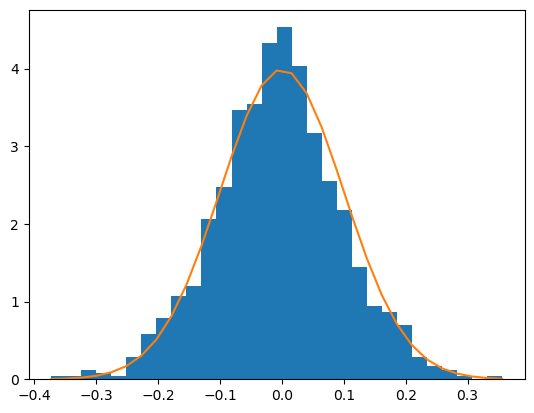

In [ ]:
import matplotlib.pyplot as plt

# Create a 3x3 array of random numbers between 0 and 1
random_array = np.random.rand(3, 3)
print(random_array)

# Create a 3x3 array of random integers between 1 and 100
rand_in_betn = np.random.randint(1, 100, (3, 3))
print(rand_in_betn)

# Create a 3x3 array of random numbers chosen from the list [1, 2, 4, 5, 9, 10]
rand_choice = np.random.choice([1, 2, 4, 5, 9, 10], size=(3, 3))
print(rand_choice)

#draw histogram
mu, sigma = 0, 0.1  # Mean and standard deviation
rand_array_normal_distro = np.random.normal(mu, sigma, 1000)  # Normal distribution
count, bins, ignored = plt.hist(rand_array_normal_distro, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)))
plt.show()